<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/TestePratico1_Outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile


In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import utils

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/train.csv.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [0]:
path = "/content/drive/My Drive/test.csv.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [0]:
#setamos o seed para reprodução do experimento
np.random.seed(2)

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

#retiramos a informação do digito
x_train = df_train.drop(["label"], axis=1).values
#apesar do dataset ja estar no formato 28x28, o framework do keras espera que seja
#informado a terceira dimensão,portanto já redimensionamentos para 28x28x1.
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = df_test.values.reshape((df_test.shape[0], 28, 28, 1))


In [0]:
# utilizamos a função to_categorial do utils do keras para fazermos o one-hot-encoder da classe.
y_train = df_train["label"].values
y_train = utils.to_categorical(y_train)
y_train2 = y_train

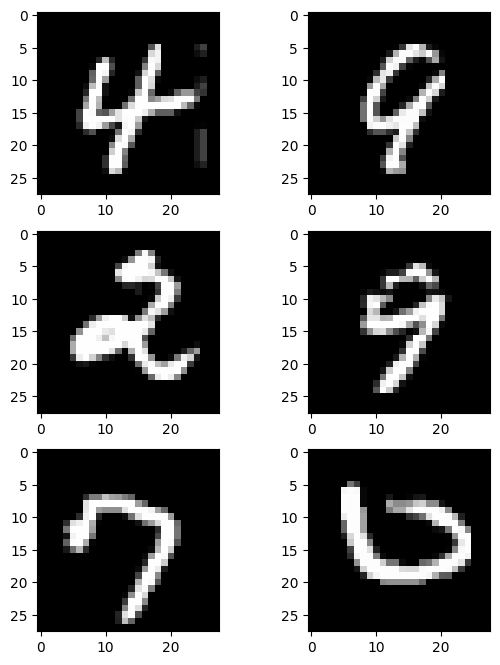

In [46]:
#visualizando randomicamente algumas imagens
for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    plt.subplot(3,2,i+1)
    plt.imshow(img.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.subplots_adjust(top=1.4)
plt.show()

In [0]:
## dado que o range de valores possível pra um pixél vai de 0-255 
## escalonamos os valores entre 0-1
## esse processo torna nosso modelo menos variante a pequenas alterações.
x_train = x_train / 255
x_train2 = x_train
x_test = x_test / 255
x_test2 = x_test

In [0]:
from tensorflow.keras import layers, models
model = models.Sequential()

In [0]:
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [50]:
optimizer = 'Adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [51]:
epochs = 10
history = model.fit(x_train, y_train, batch_size = 512, epochs = epochs)  # Treinamento 1 do modelo"""

Epoch 1/10
83/83 [==============================] - 271s 3s/step - loss: 0.4302 - accuracy: 0.8644
Epoch 2/10
83/83 [==============================] - 270s 3s/step - loss: 0.1152 - accuracy: 0.9658
Epoch 3/10
83/83 [==============================] - 271s 3s/step - loss: 0.0868 - accuracy: 0.9748
Epoch 4/10
83/83 [==============================] - 271s 3s/step - loss: 0.0701 - accuracy: 0.9784
Epoch 5/10
83/83 [==============================] - 270s 3s/step - loss: 0.0546 - accuracy: 0.9832
Epoch 6/10
83/83 [==============================] - 269s 3s/step - loss: 0.0469 - accuracy: 0.9855
Epoch 7/10
83/83 [==============================] - 270s 3s/step - loss: 0.0402 - accuracy: 0.9874
Epoch 8/10
83/83 [==============================] - 270s 3s/step - loss: 0.0356 - accuracy: 0.9888
Epoch 9/10
83/83 [==============================] - 270s 3s/step - loss: 0.0320 - accuracy: 0.9894
Epoch 10/10
83/83 [==============================] - 269s 3s/step - loss: 0.0311 - accuracy: 0.9899


In [0]:
# reduz o parâmetro de learning rate se não houver 
# melhoras em determinado número de epocas
# útil para encontrar o mínimo global.

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
batch_size2 = 32
epochs2 = 10

In [53]:
history2 = model.fit(x_train2,
                        y_train2,
                        batch_size = batch_size2,
                        epochs = epochs2,
                        validation_split=0.2,
                        verbose = 1,
                        callbacks=[learning_rate_reduction])

Epoch 1/10
1050/1050 [==============================] - 252s 240ms/step - loss: 0.0889 - accuracy: 0.9732 - val_loss: 0.0297 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 2/10
1050/1050 [==============================] - 252s 240ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0323 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 3/10
1050/1050 [==============================] - 251s 239ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0277 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 4/10
1050/1050 [==============================] - 251s 239ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0456 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 5/10
1050/1050 [==============================] - 254s 242ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0291 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 6/10
1050/1050 [==============================] - 252s 240ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0314 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 7/10
1050/1050 [============

In [0]:
history_dict = history2.history

In [55]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [0]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
range_epochs = range(1, len(acc) + 1)

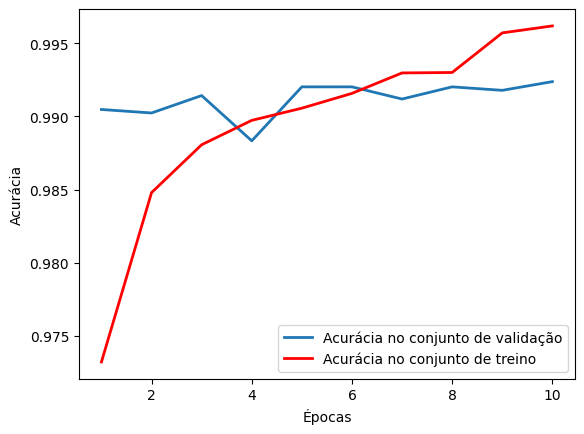

In [57]:
plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy_val, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()

In [0]:
predictions = model.predict_classes(x_test2)

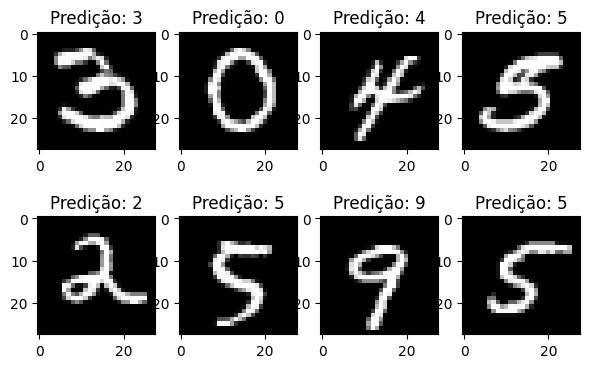

In [59]:
plt.figure(figsize=(7,14))
for i in range(0, 8):
    random_num = np.random.randint(0, len(x_test2))
    img = x_test2[random_num]
    plt.subplot(6,4,i+1)
    plt.margins(x = 20, y = 20)
    plt.title('Predição: ' + str(predictions[random_num]))
    plt.imshow(img.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
submission = pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label' : predictions})
submission.to_csv("submission.csv",index=False)